# Twitter Sentiment Analysis and Modelling

In [29]:
from nltk.corpus import stopwords
from textblob import TextBlob
import numpy as np

In [286]:

#Import Libaries
import json
import csv
import tweepy as tw
import re
import pandas as pd

In [287]:
access_token = "1033758126699364353-x3BuGV7xyqRDzFGavUH6OeCj0WpsUS"
access_secret = "sZWdviYTFuVENnNvcWEyk2G34pEcMt8zdkvGhblQcLSl4"
consumer_key = "NJjaAZwo1ebDZWHTuYFv7PobW"
consumer_secret = "QHQUEYmDoiBMqk0PitkUl2BxbAKp2XEsrVpvKtmgEYr4ZlXkph"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [288]:
#Extract tweets with the hashtag #Sex4Grades
msgs = []
msg =[]

for tweet in tweepy.Cursor(api.search, q='#SwitchOffKPLC', rpp=100).items(4000):
    msg = [tweet.created_at, tweet.text, tweet.lang, tweet.user.location, tweet.user.verified, tweet.source, tweet.retweet_count, tweet.favorite_count] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs)

In [289]:
df.head(4)

,0,1,2,3,4,5,6,7
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0
3,2019-10-13 16:29:21,@KenyaPower_Care This was not attended to. We ...,en,"Nairobi, Kenya",False,Twitter for Android,0,0


In [290]:

#export data to csv
df.to_csv("#SwitchOffKPLC.csv", index=False)

In [291]:
df.shape

(634, 8)

In [32]:
#Import Packages

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.tokenize import word_tokenize
import string
import seaborn as sns
from nltk.stem.porter import * 
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize # import word_tokenize

from nltk.corpus import stopwords #import stop words
import re # import regular expression
from nltk.tokenize import word_tokenize # import word_tokenize
from sklearn.utils import shuffle # to shuffle the data
import random # import random
import sklearn # import sklearn
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS

In [ ]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
# Loading the Dataset

dataset = pd.read_csv('#SwitchOffKPLC.csv')
dataset.head(3)

,0,1,2,3,4,5,6,7
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0


#### Renaming the Columns:

In [79]:
dataset = dataset.rename(columns={'0': 'Datetime Created', '1': 'Tweet','2':'Language','3':'Location','4':'UserAccount Verified','5':'Tweet Source','6':'Retweet_count','7':'Favourite_count'})

In [80]:
print("Dataset size:", len(dataset))

Dataset size: 634


In [6]:

dataset['UserAccount Verified'].value_counts()


False    631
True       3
Name: UserAccount Verified, dtype: int64

In [7]:
print('Dataset size:',dataset.shape)
print('Columns are:',dataset.columns)

Dataset size: (634, 8)
Columns are: Index(['Datetime Created', 'Tweet', 'Language', 'Location',
       'UserAccount Verified', 'Tweet Source', 'Retweet_count',
       'Favourite_count'],
      dtype='object')


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 8 columns):
Datetime Created        634 non-null object
Tweet                   634 non-null object
Language                634 non-null object
Location                404 non-null object
UserAccount Verified    634 non-null bool
Tweet Source            634 non-null object
Retweet_count           634 non-null int64
Favourite_count         634 non-null int64
dtypes: bool(1), int64(2), object(5)
memory usage: 35.4+ KB


In [81]:
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1
2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0


In [10]:
dataset.dtypes

Datetime Created        object
Tweet                   object
Language                object
Location                object
UserAccount Verified      bool
Tweet Source            object
Retweet_count            int64
Favourite_count          int64
dtype: object

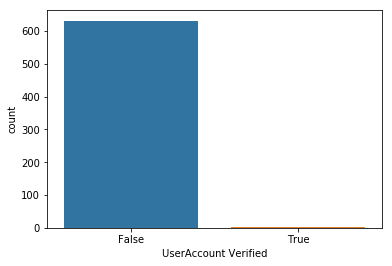

In [11]:
sns.countplot(x = 'UserAccount Verified', data = dataset)

## Data Preprocessing

## Decoding the Date Time Column

In [82]:
from datetime import date

In [83]:
dataset['Datetime Created'] = pd.to_datetime(dataset['Datetime Created'])

In [84]:
dataset['Year'] = dataset['Datetime Created'].dt.year
dataset['Week of the Year'] = dataset['Datetime Created'].dt.weekofyear
dataset['Day of the Year'] = dataset['Datetime Created'].dt.dayofyear
dataset['Month_name'] = dataset['Datetime Created'].dt.month_name()
dataset['Day of the Week'] = dataset['Datetime Created'].dt.weekday
dataset['Name of the Day'] = dataset['Datetime Created'].dt.day_name()
dataset['Hour'] = dataset['Datetime Created'].dt.hour
dataset['Minute'] = dataset['Datetime Created'].dt.minute



In [85]:
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Year,Week of the Year,Day of the Year,Month_name,Day of the Week,Name of the Day,Hour,Minute
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0,2019,42,288,October,1,Tuesday,6,24
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,NaN,False,Twitter for Android,0,1,2019,42,288,October,1,Tuesday,4,8
2,2019-10-14 18:00:17,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,in,Nairobi,False,Twitter for Android,0,0,2019,42,287,October,0,Monday,18,0


#### Correlation Plot Visualization of the Day of the Week Tweets Distribution

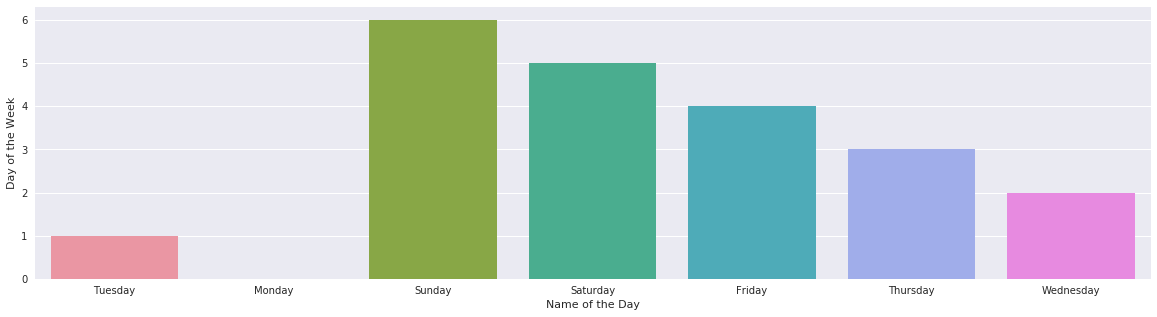

In [16]:

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=dataset['Name of the Day'],y=dataset['Day of the Week']);

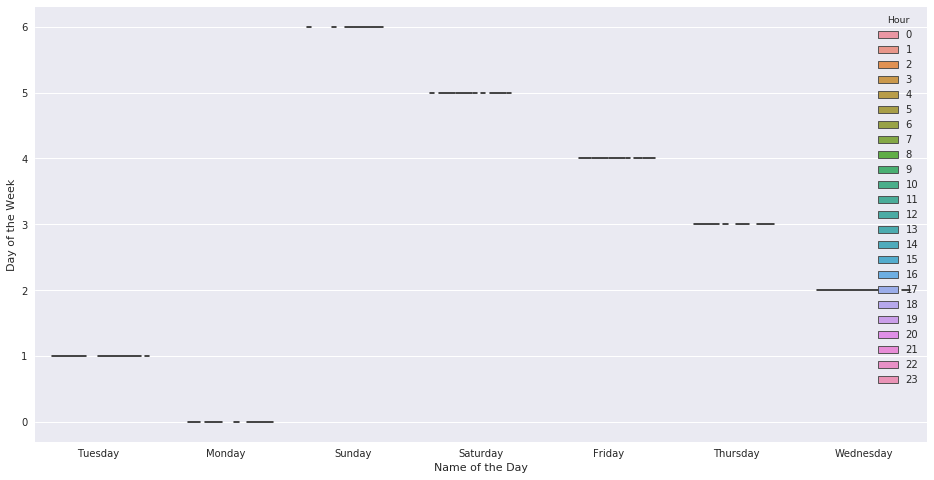

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Name of the Day',y='Day of the Week', hue='Hour',data=dataset)

### Plotting of the Hour of Tweeting Vs the Day of the Week

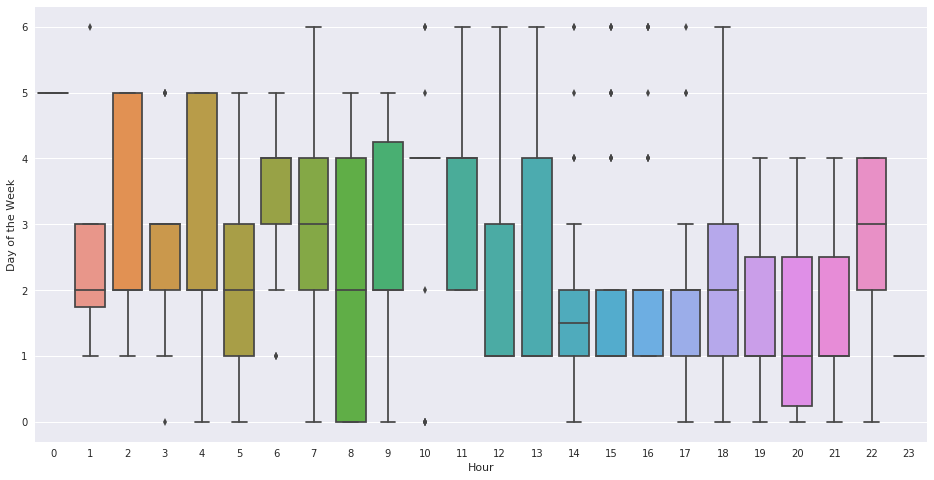

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Hour',y='Day of the Week', data=dataset)

### Plotting of the Minutes of Tweeting Vs the Day of the Week

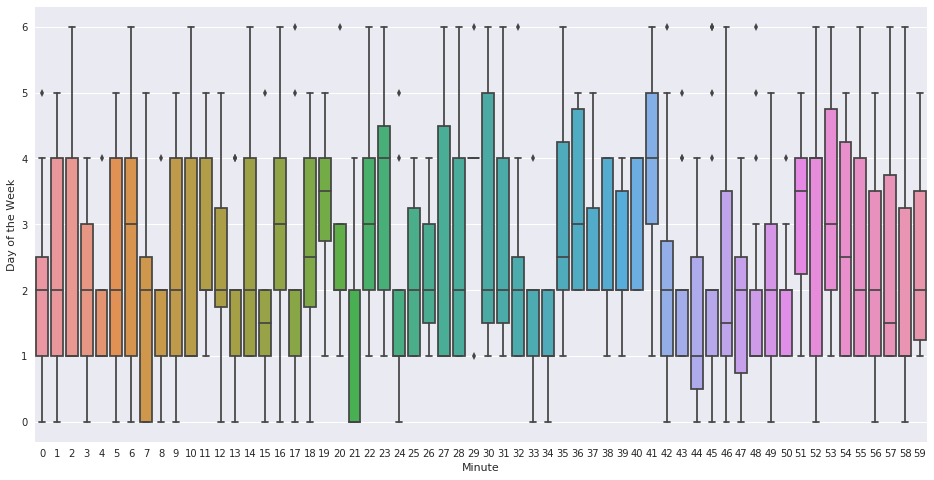

In [19]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Minute',y='Day of the Week', data=dataset)

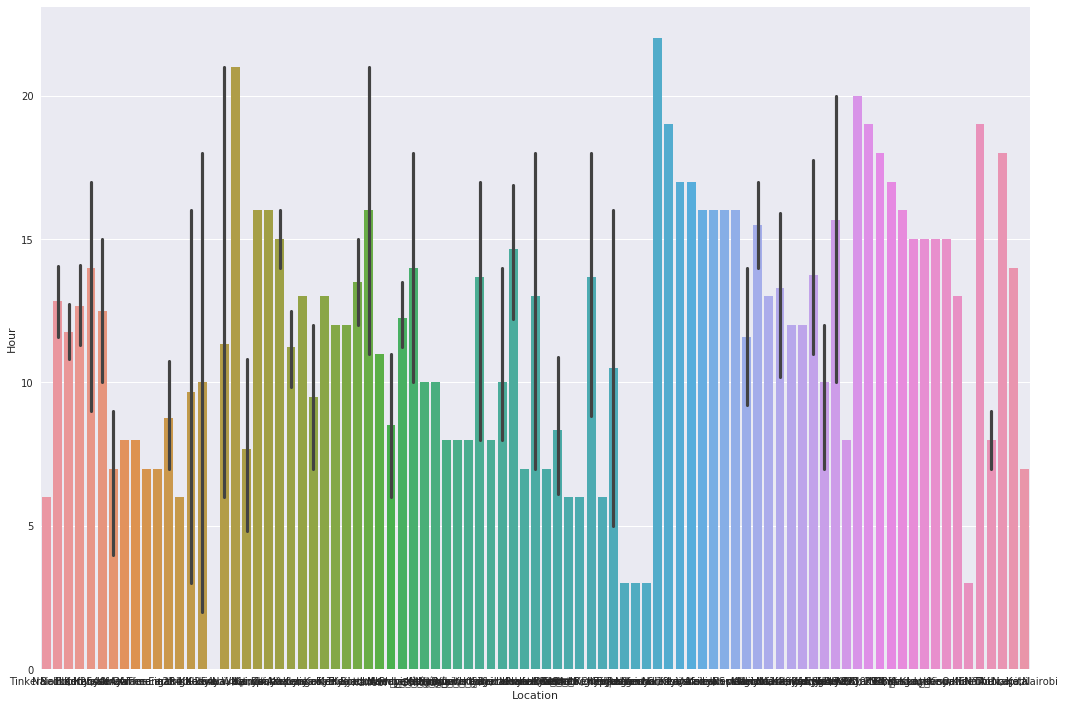

In [310]:
# with hour.
sns.factorplot(x="Location",y="Hour",data=dataset,kind='bar',size=10,aspect=1.5)

## Detecting and Treating Missing Values

,Total,Percent
Location,230,0.362776
Minute,0,0.000000
Hour,0,0.000000
Name of the Day,0,0.000000
Day of the Week,0,0.000000


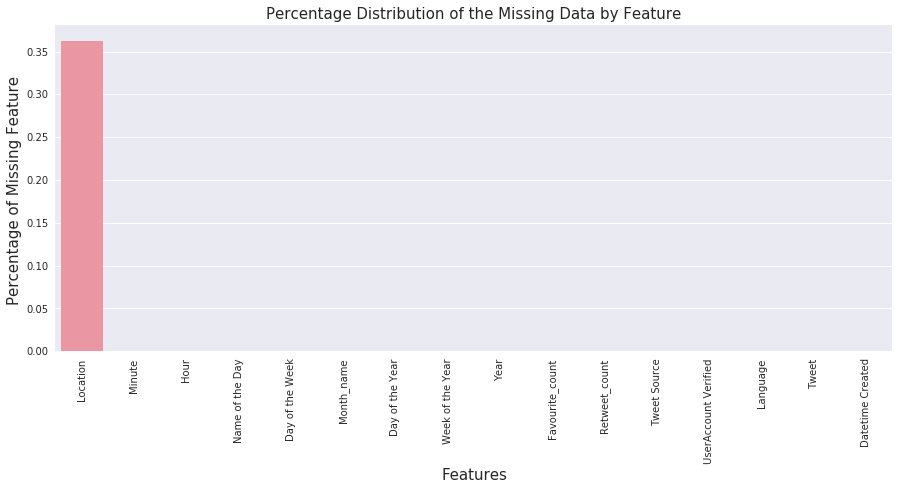

In [22]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head()

In [37]:
# Checking the missing values

missing_df =dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,Location,230,63.722397
1,Datetime Created,0,100.000000
2,Tweet,0,100.000000
3,Language,0,100.000000
4,UserAccount Verified,0,100.000000
5,Tweet Source,0,100.000000
6,Retweet_count,0,100.000000
7,Favourite_count,0,100.000000
8,Year,0,100.000000
9,Week of the Year,0,100.000000


#### Treating the Missing Value

In [46]:
dataset['Location'].mode()

0    Nairobi, Kenya
dtype: object

In [47]:
# Filling the missing values in Embarked with S

dataset['Location'] = dataset['Location'].fillna('Nairobi, Kenya')

In [35]:
df4 = dataset
df4['Location'].fillna(df4['Location'].mode(),inplace=True)

In [52]:
data_cat=dataset
data_cat['Location'].fillna(data_cat['Location'].mode()[0], inplace=True)
data_cat.head(2)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Year,Week of the Year,Day of the Year,Month_name,Day of the Week,Name of the Day,Hour,Minute
0,2019-10-15 06:24:10,RT @JerotichSeii: That you be switched off.\n\...,en,TinkerBellLand,False,Twitter Web App,119,0,2019,42,288,October,1,Tuesday,6,24
1,2019-10-15 04:08:22,UK renewables generate more electricity than f...,en,"Nairobi, Kenya",False,Twitter for Android,0,1,2019,42,288,October,1,Tuesday,4,8


In [50]:
dataset['Location'].value_counts()

Nairobi, Kenya                    336
Kenya                              58
Nairobi                            49
Nairobi,Kenya                      16
#AmKenyan                          12
Mombasa, Kenya                     10
kenya                               9
Global                              9
ID USA I Kenya | Nigeria            6
World                               5
nairobi                             4
Nairobi Kenya                       4
worldwide                           4
Africa                              4
+254                                4
Planet Earth                        3
Kabimoi, Kenya                      3
Nyali, Kenya                        3
1.2921° S, 36.8219° E               3
country with a Rail to nowhere      3
NAIROBI, KENYA                      3
nairobi kenya                       3
Owewo City, Luhano Market           3
Eldoret, Kenya                      3
nairobi 🇰🇪                          2
Zootropolis                         2
Republic of 

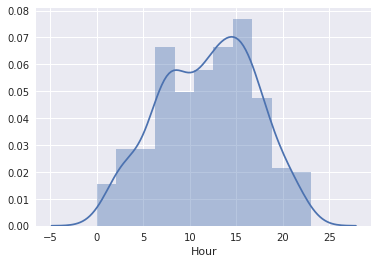

In [40]:
copy = dataset.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Hour"])

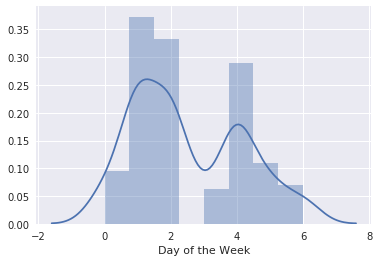

In [45]:
copy = dataset.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Day of the Week"])

## Feature Extraction using Text Data 

In [38]:
# Removing any substrings containing "http"

[re.sub(r"^.*http.*$", '', tweet) for tweet in dataset]

['Datetime Created',
 'Tweet',
 'Language',
 'Location',
 'UserAccount Verified',
 'Tweet Source',
 'Retweet_count',
 'Favourite_count',
 'Year',
 'Week of the Year',
 'Day of the Year',
 'Month_name',
 'Day of the Week',
 'Name of the Day',
 'Hour',
 'Minute']

In [313]:

# Removing  all the non-ASCII characters and replacing with a single space

[re.sub(r'[^\x00-\x7F]+','', tweet) for tweet in dataset]

['Datetime Created',
 'Tweet',
 'Language',
 'Location',
 'UserAccount Verified',
 'Tweet Source',
 'Retweet_count',
 'Favourite_count',
 'Year',
 'Week of the Year',
 'Day of the Year',
 'Month_name',
 'Day of the Week',
 'Name of the Day',
 'Hour',
 'Minute']

In [314]:

# Coverting the non readable texts into nothing

def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

In [315]:
# The actual removing of the noise and texts from the data set.

dataset['Tweet'] = dataset['Tweet'].apply(removetext)

In [316]:
dataset['Sentiment'] = dataset['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

### Calculating the Number of Words in Every Tweet

In [63]:
# Calculating the Number of Words in Every Tweet

dataset['word_count'] = dataset['Tweet'].apply(lambda x: len(str(x).split(" ")))
dataset[['Tweet','word_count']].head(10)

,Tweet,word_count
0,rt jerotichseii that you be switched off\n\nsw...,8
1,uk renewables generate more electricity than f...,16
2,jameni kenyapower switchoffkplc httpstcoc3sjiv...,4
3,kenyapower_care this was not attended to we ar...,21
4,osore_tunu kenyapower_care kplc must be switch...,7
5,rkaruria stephen_muturi kenyapower_care kenyap...,10
6,rt jerotichseii khalidhajiali01 kipmurkomen el...,19
7,rt jerotichseii wakenya judging from last week...,23
8,so from september 4th to 13th october my bill ...,23
9,njoratimothy kenyapower_care samkiura kenyapow...,5


#### Find the Number of Characters in the Tweet

In [64]:
# Finding the Number of Characters

dataset['char_count'] = dataset['Tweet'].str.len() ## this also includes spaces
dataset[['Tweet','char_count']].head()

,Tweet,char_count
0,rt jerotichseii that you be switched off\n\nsw...,74
1,uk renewables generate more electricity than f...,123
2,jameni kenyapower switchoffkplc httpstcoc3sjiv...,50
3,kenyapower_care this was not attended to we ar...,129
4,osore_tunu kenyapower_care kplc must be switch...,67


#### Finding the Average Word Length

In [65]:
# Average Word Length

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

dataset['avg_word'] = dataset['Tweet'].apply(lambda x: avg_word(x))
dataset[['Tweet','avg_word']].head()

,Tweet,avg_word
0,rt jerotichseii that you be switched off\n\nsw...,7.222222
1,uk renewables generate more electricity than f...,6.750000
2,jameni kenyapower switchoffkplc httpstcoc3sjiv...,11.750000
3,kenyapower_care this was not attended to we ar...,5.190476
4,osore_tunu kenyapower_care kplc must be switch...,7.375000


In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Finding the Number of StopWords

In [66]:
# Number of stopwords

stop = stopwords.words('english')
dataset['stopwords'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset[['Tweet','stopwords']].head()

,Tweet,stopwords
0,rt jerotichseii that you be switched off\n\nsw...,4
1,uk renewables generate more electricity than f...,4
2,jameni kenyapower switchoffkplc httpstcoc3sjiv...,0
3,kenyapower_care this was not attended to we ar...,13
4,osore_tunu kenyapower_care kplc must be switch...,2


### Finding the Number of Special Characters

In [67]:
# Number of special characters

dataset['hastags'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataset[['Tweet','hastags']].head()

,Tweet,hastags
0,rt jerotichseii that you be switched off\n\nsw...,0
1,uk renewables generate more electricity than f...,0
2,jameni kenyapower switchoffkplc httpstcoc3sjiv...,0
3,kenyapower_care this was not attended to we ar...,0
4,osore_tunu kenyapower_care kplc must be switch...,0


#### Finding the Number of Numerics in the Tweets

In [68]:
#Number of numerics

dataset['numerics'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
dataset[['Tweet','numerics']].head()

,Tweet,numerics
0,rt jerotichseii that you be switched off\n\nsw...,0
1,uk renewables generate more electricity than f...,0
2,jameni kenyapower switchoffkplc httpstcoc3sjiv...,0
3,kenyapower_care this was not attended to we ar...,0
4,osore_tunu kenyapower_care kplc must be switch...,0


### Finding the Number of Special Characters

In [69]:
#Number of special characters

dataset['hastags'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataset[['Tweet','hastags']].head()

,Tweet,hastags
0,rt jerotichseii that you be switched off\n\nsw...,0
1,uk renewables generate more electricity than f...,0
2,jameni kenyapower switchoffkplc httpstcoc3sjiv...,0
3,kenyapower_care this was not attended to we ar...,0
4,osore_tunu kenyapower_care kplc must be switch...,0


#### The Number of Upper Case Words

In [60]:
# Number of Uppercase words

dataset['upper'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
dataset[['Tweet','upper']].head()

,Tweet,upper
0,RT @JerotichSeii: That you be switched off.\n\...,1
1,UK renewables generate more electricity than f...,1
2,Jameni @KenyaPower #SwitchOffKPLC https://t.co...,0
3,@KenyaPower_Care This was not attended to. We ...,0
4,@osore_tunu @KenyaPower_Care KPLC must be swit...,1


#### Converting the Tweet to Lower Case

In [61]:
# To Lower case

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: x.lower())

### Removing Punctuations in the Tweet

In [62]:
# Removing Punctuation

dataset['Tweet'] = dataset['Tweet'].str.replace('[^\w\s]','')
dataset['Tweet'].head()

0    rt jerotichseii that you be switched off\n\nsw...
1    uk renewables generate more electricity than f...
2    jameni kenyapower switchoffkplc httpstcoc3sjiv...
3    kenyapower_care this was not attended to we ar...
4    osore_tunu kenyapower_care kplc must be switch...
Name: Tweet, dtype: object

### Removing Special Characters, Numbers and Punctuations

In [86]:
# Remove special characters, numbers, punctuations

dataset['Tweet'] = dataset['Tweet'].str.replace("[^a-zA-Z#]", " ")

### Removing Twitter Handles (@user)

In [91]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [92]:
# remove twitter handles (@user)
dataset['Tweet'] = np.vectorize(remove_pattern)(dataset['Tweet'], "@[\w]*")

### Removing the Stop Words

In [70]:
# Removal of Stop Words

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataset['Tweet'].head()

0    rt jerotichseii switched switchoffkplc httpstc...
1    uk renewables generate electricity fossil fuel...
2    jameni kenyapower switchoffkplc httpstcoc3sjiv...
3    kenyapower_care attended still dark 7days coun...
4    osore_tunu kenyapower_care kplc must switched ...
Name: Tweet, dtype: object

### Removing the Short Words

In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#### Removing the Common Word

In [72]:
#Common word removal

freq = pd.Series(' '.join(dataset['Tweet']).split()).value_counts()[:10]
freq = list(freq.index)
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataset['Tweet'].head()

0                                                     
1    uk renewables generate electricity fossil fuel...
2                            jameni httpstcoc3sjivtbwd
3    attended still dark 7days counting acceptable ...
4                                 osore_tunu kplc must
Name: Tweet, dtype: object

### Stemming the Tweets 
'''Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. 
For this purpose, we will use PorterStemmer from the NLTK library.


Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [94]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
dataset['Tweet'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    RT jerotichseii that you be switch off #switch...
1    UK renew gener more electr than fossil fuel fo...
2    jameni kenyapow #switchoffkplc http t co C sji...
3    kenyapow care thi wa not attend to We are stil...
4    osor tunu kenyapow care kplc must be switch of...
5    rkaruria stephen muturi kenyapow care kenyapow...
6    RT jerotichseii khalidhajiali kipmurkomen eliu...
7    RT jerotichseii wakenya judg from last week s ...
8    So from septemb th to th octob my bill is whil...
9    njoratimothi kenyapow care samkiura kenyapow #...
Name: Tweet, dtype: object

## Story Generation and Visualization from Tweets


##### We explore the Cleaned Tweets in this section.  We want to gain insights

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

What are the most common words in the entire dataset?

What are the most common words in the dataset for negative and positive tweets, respectively?

How many hashtags are there in a tweet?

Which trends are associated with my dataset?

Which trends are associated with either of the sentiments? Are they compatible with the sentiments?
 

### A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

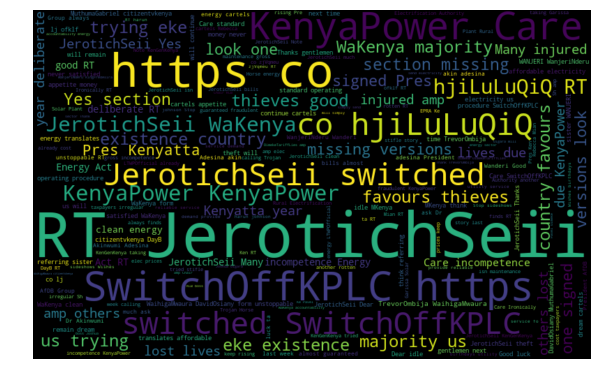

In [95]:
# Creating word Cloud for all Words in all tweets
allWords = ' '.join([text for text in dataset['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [97]:
dataset['Sentiment'] = dataset['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

### D) Understanding the impact of Hashtags on tweets sentiment
Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset: 


The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [96]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [98]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(dataset['Tweet'][dataset['Sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(dataset['Tweet'][dataset['Sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

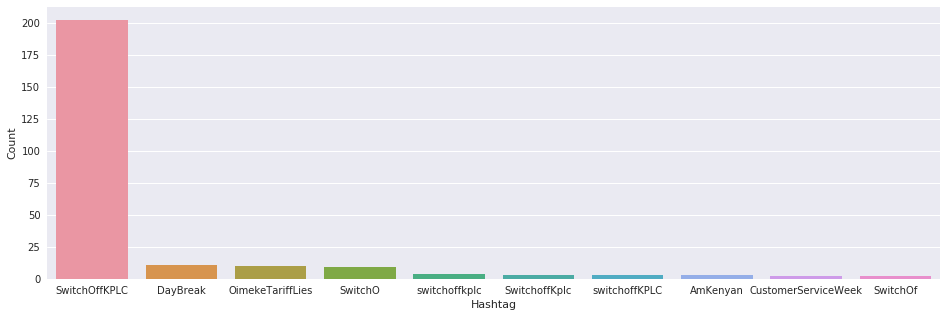

In [99]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [333]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: remove_punct(x))
dataset.head(2)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Year,Week of the Year,...,Hour,Minute,Sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,2019-10-15 06:24:10,rt jerotichseii switched switchoffkplc httpstc...,en,TinkerBellLand,False,Twitter Web App,119,0,2019,42,...,6,24,0.000,8,83,8.222222,2,1,0,1
1,2019-10-15 04:08:22,uk renewables generate electricity fossil fuel...,en,NaN,False,Twitter for Android,0,1,2019,42,...,4,8,0.375,16,131,7.250000,4,3,0,1


In [74]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: tokenization(x.lower()))
dataset.head(2)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Year,Week of the Year,...,Name of the Day,Hour,Minute,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,2019-10-15 06:24:10,[],en,TinkerBellLand,False,Twitter Web App,119,0,2019,42,...,Tuesday,6,24,8,74,7.222222,4,0,0,1
1,2019-10-15 04:08:22,"[uk, renewables, generate, electricity, fossil...",en,"Nairobi, Kenya",False,Twitter for Android,0,1,2019,42,...,Tuesday,4,8,16,123,6.750000,4,0,0,1


In [336]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: stemming(x))
dataset.head()

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Year,Week of the Year,...,Hour,Minute,Sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,2019-10-15 06:24:10,"[rt, jerotichseii, switch, switchoffkplc, http...",en,TinkerBellLand,False,Twitter Web App,119,0,2019,42,...,6,24,0.000,8,83,8.222222,2,1,0,1
1,2019-10-15 04:08:22,"[uk, renew, gener, electr, fossil, fuel, first...",en,NaN,False,Twitter for Android,0,1,2019,42,...,4,8,0.375,16,131,7.250000,4,3,0,1
2,2019-10-14 18:00:17,"[jameni, kenyapow, switchoffkplc, httpstcocsji...",in,Nairobi,False,Twitter for Android,0,0,2019,42,...,18,0,0.000,4,57,13.500000,0,1,0,0
3,2019-10-13 16:29:21,"[kenyapowercar, attend, still, dark, day, coun...",en,"Nairobi, Kenya",False,Twitter for Android,0,0,2019,41,...,16,29,-0.150,21,138,5.619048,9,0,0,0
4,2019-10-13 15:35:09,"[osoretunu, kenyapowercar, kplc, must, switch,...",en,NaN,False,Twitter for Android,0,1,2019,41,...,15,35,0.000,7,71,7.875000,1,1,0,1


In [30]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [227]:
#User Defined Function to clean unwanted text patterns from all tweets
# input - text to clean,pattern to replace
def cleantext(inputword,pattern):
    r = re.findall(pattern=pattern,string=inputword)
    for i in r:
        inputword = re.sub(pattern=i,repl='',string=inputword)
    return inputword

In [228]:
dataset['Tweet'] = np.vectorize(cleantext)(dataset['Tweet'],'@[\w]*')
dataset.head(3)

,Datetime Created,Tweet,Language,Location,UserAccount Verified,Tweet Source,Retweet_count,Favourite_count,Year,Week of the Year,...,Name of the Day,Hour,Minute,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,2019-10-14 18:00:17,jameni kenyapower switchoffkplc httpstcoc3sjiv...,in,Nairobi,False,Twitter for Android,0,0,2019,42,...,Monday,18,0,4,57,13.500000,0,1,0,0
1,2019-10-13 16:29:21,kenyapower_care attended still dark 7days coun...,en,"Nairobi, Kenya",False,Twitter for Android,0,0,2019,41,...,Sunday,16,29,21,139,5.666667,8,0,0,0
2,2019-10-13 15:35:09,osore_tunu kenyapower_care kplc must switched ...,en,NaN,False,Twitter for Android,0,1,2019,41,...,Sunday,15,35,7,71,7.875000,1,1,0,1


In [337]:
dataset['Tweet'].head(3)

0    [rt, jerotichseii, switch, switchoffkplc, http...
1    [uk, renew, gener, electr, fossil, fuel, first...
2    [jameni, kenyapow, switchoffkplc, httpstcocsji...
Name: Tweet, dtype: object

## 4. Extracting Features from Cleaned Tweets

To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. In this article, we will be covering only Bag-of-Words and TF-IDF.

### Bag-of-Words Features

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(dataset['Tweet'])

### TF-IDF Features

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['Tweet'])

#### Vectorization of the Tweets

In [106]:
# Vectorization
# Importing Required Packages

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [259]:
# Applying Bag of Words Vectorization to the Tweets

bow_vectorizer = CountVectorizer(stop_words= 'english')
bow = bow_vectorizer.fit_transform(dataset['Tweet'])

In [260]:
#Applying TF-IDF Vectorization to the Tweets

tfidf_vectorizer = TfidfVectorizer(stop_words= 'english')
tfidf = tfidf_vectorizer.fit_transform(dataset['Tweet'])

## Saving the Cleaned Dataset for Visualization and Modelling

In [282]:
# Save the Cleaned Twitter Dataset for Further Visualizations and Modelling

dataset.to_csv("CleanDatasetFile.csv")
dataset.columns

Index(['Datetime Created', 'Tweet', 'Language', 'Location',
       'UserAccount Verified', 'Tweet Source', 'Retweet_count',
       'Favourite_count', 'Year', 'Week of the Year', 'Day of the Year',
       'Month_name', 'Day of the Week', 'Name of the Day', 'Hour', 'Minute'],
      dtype='object')

## 5. Model Building: Sentiment Analysis

We are now done with the Pre-Modelling Stages  required to get the data in the proper form and shape.
We will proceed to build a predictive models on the dataset using thr Two Feature Set: Bag-of-Words and TF-IDF.


We will use logistic regression to build the models. It predicts the probability of occurrence of an event by fitting data to a logit function.